# Zillow Home Price Prediction
# 
## The aim of the project is to feed the Zillow House Price dataset into a machine learning algorithm and predict whether the house prices in the selected region will drop or increase.

In [37]:
import pandas as pd
import numpy as np

data_files = ["Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv", 'Metro_median_sale_price_uc_sfrcondo_week.csv']

data = [pd.read_csv(f) for f in data_files]

In [38]:
#Looking into the Zillow Home values for condos in the US, by month

data[0]

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,102001,0,United States,country,NaN,109323.629012,109154.034652,109213.959881,109422.056145,109671.155085,...,329433.472878,334293.345957,340125.707301,346203.327354,352717.394829,356945.667516,359718.579670,359350.224752,358215.302365,358282.930208
1,394913,1,"New York, NY",msa,NY,188630.801041,186913.221718,186527.685745,186211.464806,186103.395161,...,578138.406356,583150.964369,588772.302789,598951.858207,607927.900018,615720.125097,619986.876586,621573.137884,620501.194989,619774.445218
2,753899,2,"Los Angeles, CA",msa,CA,187073.406162,186404.133695,186112.156345,186088.465059,185957.334353,...,876723.868168,889963.205427,904246.758327,933355.266190,952799.735114,957843.917793,935600.608825,931697.594288,900374.452615,895380.194948
3,394463,3,"Chicago, IL",msa,IL,146964.023727,146963.247033,146044.835204,147462.728548,147990.841500,...,291249.773498,294058.217797,297901.790214,303296.872553,308010.078892,313226.936837,314276.284782,313372.734249,311777.448413,311695.705112
4,394514,4,"Dallas, TX",msa,TX,113039.806652,112955.588792,113275.209782,113802.713604,114041.578204,...,350430.532764,359104.687712,369655.417004,375712.080035,390853.930211,398753.637650,400391.557757,396049.916286,390557.183060,389153.087426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,753929,923,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,122586.267065,124095.324022,125062.657353,124789.235158,125070.923152,124781.552505,128142.450231,128546.171013,129048.316681,130240.580492
895,394743,924,"Ketchikan, AK",msa,AK,NaN,NaN,NaN,NaN,NaN,...,NaN,372600.407383,370189.434968,372026.499351,374196.134784,376705.427276,384565.040365,385447.564530,387188.764342,390135.795433
896,753874,925,"Craig, CO",msa,CO,71599.787477,71882.476461,72295.302150,72835.365320,72263.392965,...,273095.086356,274342.567596,273023.005641,274838.682701,274354.615458,275677.116057,286964.604193,288810.865980,290297.271120,292595.671146
897,394767,926,"Lamesa, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,104076.813159,105062.235344,106979.856709,108129.096248,108441.730189,110521.982816,113167.060566,113648.097476,113896.675429,113298.679092


In [39]:
#Looking into the median sale prices for condos in the US, by week

data[1]

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-02,2008-02-09,2008-02-16,2008-02-23,2008-03-01,...,2022-05-07,2022-05-14,2022-05-21,2022-05-28,2022-06-04,2022-06-11,2022-06-18,2022-06-25,2022-07-02,2022-07-09
0,102001,0,United States,Country,NaN,190000.0,190000.0,193000.0,189900.0,194900.0,...,369900.0,370000.0,370000.0,375000.0,375000.0,370000.0,375000.0,370000.0,370000.0,362500.0
1,394913,1,"New York, NY",Msa,NY,400000.0,418250.0,420000.0,420000.0,400000.0,...,550000.0,555000.0,550000.0,575000.0,575000.0,578000.0,590000.0,582000.0,585000.0,595000.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,497500.0,515000.0,520000.0,525000.0,498250.0,...,914000.0,925000.0,925000.0,951000.0,950000.0,920500.0,925000.0,900000.0,900500.0,906000.0
3,394463,3,"Chicago, IL",Msa,IL,245000.0,245000.0,251000.0,255000.0,255000.0,...,315000.0,310000.0,315500.0,315000.0,330000.0,324950.0,335000.0,325000.0,325000.0,315000.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,144250.0,148900.0,139000.0,143700.0,145900.0,...,422000.0,430000.0,430000.0,425000.0,440000.0,425000.0,427750.0,426000.0,420000.0,420000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,394528,90,"Daytona Beach, FL",Msa,FL,NaN,170000.0,182400.0,170000.0,170000.0,...,340500.0,345000.0,327700.0,345000.0,350000.0,343250.0,359900.0,352000.0,336000.0,342990.0
80,394531,91,"Des Moines, IA",Msa,IA,138000.0,160000.0,150000.0,151750.0,154500.0,...,270000.0,285250.0,295000.0,273450.0,301000.0,290000.0,300900.0,281900.0,289250.0,280000.0
81,395006,100,"Provo, UT",Msa,UT,NaN,206000.0,215500.0,210000.0,210000.0,...,527000.0,540000.0,535000.0,552500.0,543750.0,571000.0,530300.0,569900.0,539950.0,572500.0
82,394549,104,"Durham, NC",Msa,NC,210000.0,170000.0,170500.0,197500.0,180000.0,...,456000.0,450000.0,428500.0,480000.0,465000.0,440000.0,450250.0,416000.0,465000.0,435250.0


In [40]:
#Exploring the records kept the in the datasets

d = data[1]
d.iloc[82]

RegionID          394549
SizeRank             104
RegionName    Durham, NC
RegionType           Msa
StateName             NC
                 ...    
2022-06-11      440000.0
2022-06-18      450250.0
2022-06-25      416000.0
2022-07-02      465000.0
2022-07-09      435250.0
Name: 82, Length: 759, dtype: object

In [41]:
#Prompting the user for the area of interest

regionCode = int(input("Enter the region ID of the region to be used: "))

found = False
for df in data:
    if (regionCode in df["RegionID"].values):
       found = True
    else:
        found = False

if found == True:
    
    d0 = data[0]
    d1 = data[1]
    index = []
    for d in (d0, d1):
        index.append(d[d["RegionID"] == regionCode].index[0])
    
    #print(index[0], index[1])
    #data["RegionID"]==regionCode].index
    
elif found == False:
    print("The region code you entered was not found in both databases")


Enter the region ID of the region to be used: 394602


In [42]:
#Isolating the data for the requested region

data = [pd.DataFrame(data[0].iloc[index[0],5:]), pd.DataFrame(data[1].iloc[index[1],5:])]

In [43]:
data[0]

,149
1996-01-31,162647.387508
1996-02-29,162971.577089
1996-03-31,163795.505395
1996-04-30,164411.018697
1996-05-31,164636.930931
...,...
2022-05-31,592461.956241
2022-06-30,588906.037285
2022-07-31,579125.213301
2022-08-31,571859.422799


In [44]:
data[1]

,83
2008-02-02,NaN
2008-02-09,255000.0
2008-02-16,205000.0
2008-02-23,229900.0
2008-03-01,235000.0
...,...
2022-06-11,560000.0
2022-06-18,595000.0
2022-06-25,550000.0
2022-07-02,556058.0


In [45]:
#Since the data in one csv is according to weeks and in the other it's according to months
#The data is merged to along the dates when both datasets coincide

for df in data:
    df.index = pd.to_datetime(df.index)
    df["month"] = df.index.to_period("M")

In [46]:
data[1]

,83,month
2008-02-02,NaN,2008-02
2008-02-09,255000.0,2008-02
2008-02-16,205000.0,2008-02
2008-02-23,229900.0,2008-02
2008-03-01,235000.0,2008-03
...,...,...
2022-06-11,560000.0,2022-06
2022-06-18,595000.0,2022-06
2022-06-25,550000.0,2022-06
2022-07-02,556058.0,2022-07


In [47]:
price_data = data[0].merge(data[1], on ="month")

In [48]:
price_data.index = data[1].index

In [49]:
#Since the month data is not actually required for the ML training that data is deleted
#And the data for the region is consolidated into one dataframe

del price_data["month"]
price_data.columns = ["price", "value"]

price_data

,price,value
2008-02-02,250627.538084,NaN
2008-02-09,250627.538084,255000.0
2008-02-16,250627.538084,205000.0
2008-02-23,250627.538084,229900.0
2008-03-01,251336.431367,235000.0
...,...,...
2022-06-11,588906.037285,560000.0
2022-06-18,588906.037285,595000.0
2022-06-25,588906.037285,550000.0
2022-07-02,579125.213301,556058.0


In [50]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2008-02-02 to 2022-07-09
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   price   754 non-null    object
 1   value   753 non-null    object
dtypes: object(2)
memory usage: 17.7+ KB


<AxesSubplot:>

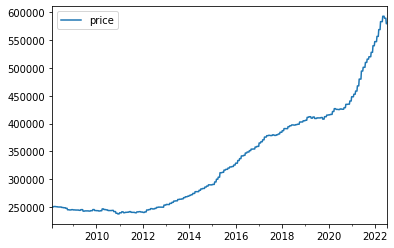

In [51]:
#Then we plot the trends of the prices and values for the region

price_data.plot.line(y = "price", use_index = True)

<AxesSubplot:>

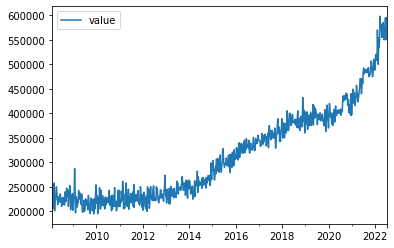

In [52]:
price_data.plot.line(y = "value", use_index = True)

Since we do not have enough data from just the median price and Zillow values of the properties

We enter the feature engineering phase of the project to give our model more data to make better predictions

In [53]:
#The first feature we introduce is the next quarter price 
#to give the model some idea of how the prices tend to change over time

price_data["next quarter"] = price_data["price"].shift(-12)

In [54]:
price_data

,price,value,next quarter
2008-02-02,250627.538084,NaN,250963.693787
2008-02-09,250627.538084,255000.0,250536.377286
2008-02-16,250627.538084,205000.0,250536.377286
2008-02-23,250627.538084,229900.0,250536.377286
2008-03-01,251336.431367,235000.0,250536.377286
...,...,...,...
2022-06-11,588906.037285,560000.0,NaN
2022-06-18,588906.037285,595000.0,NaN
2022-06-25,588906.037285,550000.0,NaN
2022-07-02,579125.213301,556058.0,NaN


In [55]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2008-02-02 to 2022-07-09
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         754 non-null    object
 1   value         753 non-null    object
 2   next quarter  742 non-null    object
dtypes: object(3)
memory usage: 23.6+ KB


In [56]:
#We clean up the dataframe of all the null values

price_data.dropna(inplace = True)

price_data

,price,value,next quarter
2008-02-09,250627.538084,255000.0,250536.377286
2008-02-16,250627.538084,205000.0,250536.377286
2008-02-23,250627.538084,229900.0,250536.377286
2008-03-01,251336.431367,235000.0,250536.377286
2008-03-08,251336.431367,257728.0,250536.377286
...,...,...,...
2022-03-19,568536.62896,552750.0,588906.037285
2022-03-26,568536.62896,598200.0,588906.037285
2022-04-02,582774.081051,575000.0,588906.037285
2022-04-09,582774.081051,581644.0,579125.213301


In [57]:
#The next feature we introduce helps the model learn when the price increases or decreases
#When training the model, we will be training to predict this feature correctly

price_data["change"] = (price_data["next quarter"] > price_data["value"]).astype(int)

price_data

,price,value,next quarter,change
2008-02-09,250627.538084,255000.0,250536.377286,0
2008-02-16,250627.538084,205000.0,250536.377286,1
2008-02-23,250627.538084,229900.0,250536.377286,1
2008-03-01,251336.431367,235000.0,250536.377286,1
2008-03-08,251336.431367,257728.0,250536.377286,0
...,...,...,...,...
2022-03-19,568536.62896,552750.0,588906.037285,1
2022-03-26,568536.62896,598200.0,588906.037285,0
2022-04-02,582774.081051,575000.0,588906.037285,1
2022-04-09,582774.081051,581644.0,579125.213301,0


In [58]:
price_data["change"].value_counts()

1    700
0     41
Name: change, dtype: int64

In [59]:
#We classify the features into the predictors and target feature

predictors = ["price", "value", "next quarter"]
target = "change"


In [60]:
#We import the necessary machine learning model 
#and a metric to judge the accuracy of the model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [61]:
#We pass the data to the model and 
#then check for accuracies in the data by comparing the data one year at a time

start = 260
step = 52

def predict(train, test, predictors, target):
    rf = RandomForestClassifier(min_samples_split = 10, random_state = 1)
    rf.fit(train[predictors], train[target])
    preds = rf.predict(test[predictors])
    return preds

def test(data, predictors, target):
    all_preds = []
    for i in range(start, data.shape[0], step):
        train = price_data.iloc[:i]
        test = price_data.iloc[i:(i+step)]
        all_preds.append(predict(train, test, predictors, target))
        
    preds= np.concatenate(all_preds)
    return preds, accuracy_score(data.iloc[start:][target], preds)

In [62]:
preds, accuracy = test(price_data, predictors, target)

In [63]:
accuracy_metrics = []

accuracy_metrics.append(accuracy)

accuracy

0.9126819126819127

We try to create even more features to give the model more data to increase accuracy as far as possible

In [64]:
#The 'recent' features gives the model more of an idea 
#of how the feature values have been changing over the last year

recent = price_data.rolling(52, min_periods = 1).mean()

recent_ratio = [p + "_year" for p in predictors]

price_data[recent_ratio] = price_data[predictors] / recent[predictors]

price_data

,price,value,next quarter,change,price_year,value_year,next quarter_year
2008-02-09,250627.538084,255000.0,250536.377286,0,1.0,1.0,1.0
2008-02-16,250627.538084,205000.0,250536.377286,1,1.0,0.891304,1.0
2008-02-23,250627.538084,229900.0,250536.377286,1,1.0,0.99971,1.0
2008-03-01,251336.431367,235000.0,250536.377286,1,1.00212,1.016326,1.0
2008-03-08,251336.431367,257728.0,250536.377286,0,1.001695,1.089641,1.0
...,...,...,...,...,...,...,...
2022-03-19,568536.62896,552750.0,588906.037285,1,1.101304,1.136188,1.087528
2022-03-26,568536.62896,598200.0,588906.037285,0,1.0968,1.22215,1.083882
2022-04-02,582774.081051,575000.0,588906.037285,1,1.119483,1.16854,1.080261
2022-04-09,582774.081051,581644.0,579125.213301,0,1.114741,1.174784,1.059398


In [65]:
#We train the model with the new predictors added

preds, accuracy = test(price_data, predictors + recent_ratio, target)

In [66]:
accuracy_metrics.append(accuracy)

accuracy_metrics

[0.9126819126819127, 0.9542619542619543]

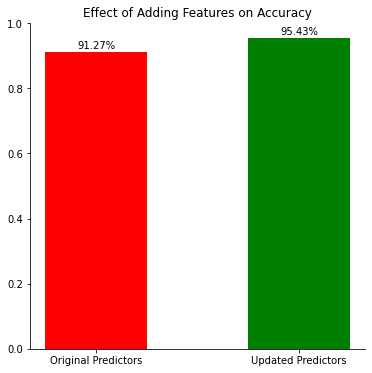

In [67]:
#We visualize the difference in accuracies in the original model and the updated model

import matplotlib.pyplot as plt

x_label = ["Original Predictors", "Updated Predictors"]
fig,ax = plt.subplots(figsize = (6,6))

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.bar(x_label, accuracy_metrics, width = 0.5, color = ["red", "green"])

for i in range(len(x_label)):
    plt.text(x_label[i], accuracy_metrics[i]+0.01, f"{(accuracy_metrics[i]*100).round(2)}%", ha = 'center')
        
plt.title("Effect of Adding Features on Accuracy")
plt.show()

In [68]:
pred_match = (preds == price_data[target].iloc[start:])

pred_match[pred_match == True] = "green"
pred_match[pred_match == False] = "red"

<AxesSubplot:xlabel='index', ylabel='value'>

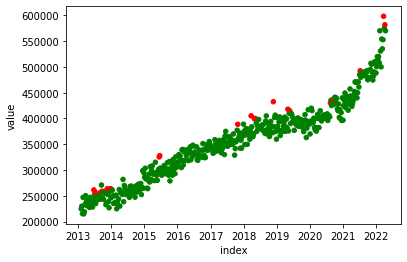

In [69]:
#We visualize how well the model is able to predict changes in market values
#in an easy to understand graph

plot_pred = price_data.iloc[start:].copy()

plot_pred.reset_index().plot.scatter(x = "index", y ="value", color = pred_match)

In [70]:
#We import another tool from sklearn to evaluate how helpful the Zillow valuations are 
#to predicting the home prices accurately 

from sklearn.inspection import permutation_importance

rf = RandomForestClassifier(min_samples_split = 10, random_state = 1)
rf.fit(price_data[predictors+recent_ratio], price_data[target])

result = permutation_importance(rf, price_data[predictors+recent_ratio], price_data[target], n_repeats = 10, random_state = 1)

result["importances_mean"]

array([0.00107962, 0.0097166 , 0.00026991, 0.00850202, 0.10877193,
       0.00877193])

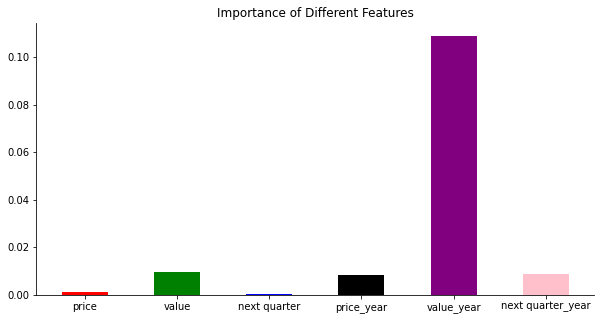

In [71]:
x_label = predictors + recent_ratio

fig,ax = plt.subplots(figsize = (10,5))


ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.bar(x_label, result["importances_mean"], width = 0.5, color = ["red", "green", "blue", "black", "purple", "pink"])
        
plt.title("Importance of Different Features")
plt.show()